Autor: Martín de las Heras

## Examen Final

En primer lugar, importamos todas las librerías que vamos a necesitar:

In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

### Apartado a)

Construye el diagrama de dispersión y la recta de regresión lineal de Thalach sobre Age. Explica si es predecible la frecuencia cardíaca a partir de la edad, indicando el modelo con la estimación de sus parámetros, sus errores y su relevancia, incluyendo la tabla correspondiente.

En primer lugar, importamos el dataset y definimos las variables **X** e **Y** en como *thalach* y *age*:

In [84]:
df = pd.read_csv('dataset.csv')
X = df['thalach']
Y = df['age']

A continuación generamos la regresión lineal, al igual que el diagrama de dispersión:

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     40.59
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           1.20e-09
Time:                        16:24:39   Log-Likelihood:                -735.84
No. Observations:                 209   AIC:                             1476.
Df Residuals:                     207   BIC:                             1482.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.5112      3.621     21.405      0.0

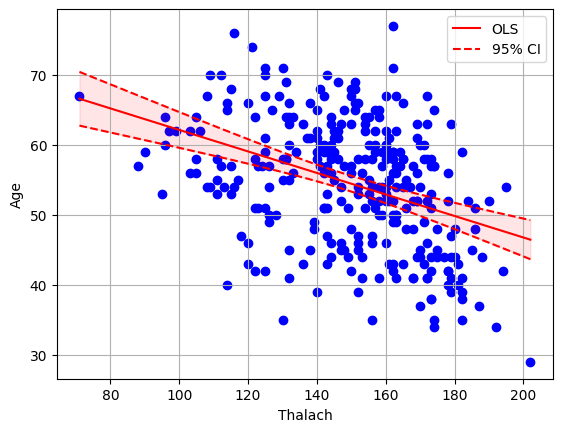

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                        train_size   = 0.69,
                                        random_state = 1234
                                    )

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())
modelo.conf_int(alpha=0.05)

# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog=X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train['thalach']
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
plt.scatter(X, Y, marker='o', color = "blue")
plt.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS", color='red')
plt.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
plt.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
plt.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1, color='red')
plt.grid()
plt.xlabel("Thalach")
plt.ylabel("Age")
plt.legend();

Solamente con la gráfica podemos deducir que no se ajusta correctamente a la realidad, de todas formas, si miramos la tabla con los valores, podemos ver que el indicador R^2 es muy bajo, por lo que no nos valdría como estimador.

Ante la problemática de decidir si un paciente tiene cardiopatía o no, se toma como conjunto de entrenamiento (TR) 
un 69 % de filas al azar (son 209 filas) y un conjunto de test de un 31% restantes de filas (son 94 filas).

## Apartado b)

Entrenar un modelo de regresión logística para predecir la probabilidad de que un paciente tenga cardiopatía basándose en la variable Restecg. Idem basándose en la variable Age. Adjuntar los gráficos correspondientes con su interpretación. Comparar la matriz de confusión en TR con la matriz de confusión en TS.

En primer lugar, redefinimos las variables **X** e **Y** con los valores que nos interesan:

In [94]:
X = df['restecg']
Y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                        train_size   = 0.69,
                                        random_state = 1234
                                    )

A continuación, realizamos la regresión logística y la representamos:

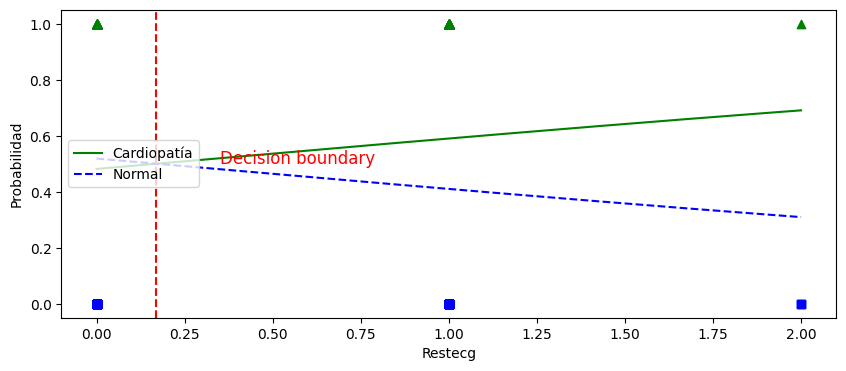

In [95]:
log_reg = LogisticRegression()
log_reg.fit(X_train.array.reshape(-1,1), Y_train)

X_new = np.linspace(0, 2, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.grid()
plt.plot(X_new, y_proba[:, 1], "g-", label="Cardiopatía")
plt.plot(X_new, y_proba[:, 0], "b--", label="Normal")
plt.xlabel("Restecg")
plt.ylabel("Probabilidad")
plt.grid()
plt.legend(loc="center left")

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.axvline(x=decision_boundary, color='red', linestyle='--')
plt.text(decision_boundary+0.4, 0.5, "Decision boundary", fontsize=12, color="red", ha="center")

plt.scatter(X[Y==1],Y[Y==1], marker='^', c='g')
plt.scatter(X[Y==0],Y[Y==0], marker='s', c='b')

plt.show()

In [100]:
ConfusionMatrixDisplay(confusion_matrix(Y_test,log_reg.predict(X_test.array.reshape(-1,1)),labels=['Normal','Cardiopatía']), display_labels=['Normal','Cardiopatía']).plot(cmap='Blues');

ValueError: At least one label specified must be in y_true

Repetimos pero con *Age*:

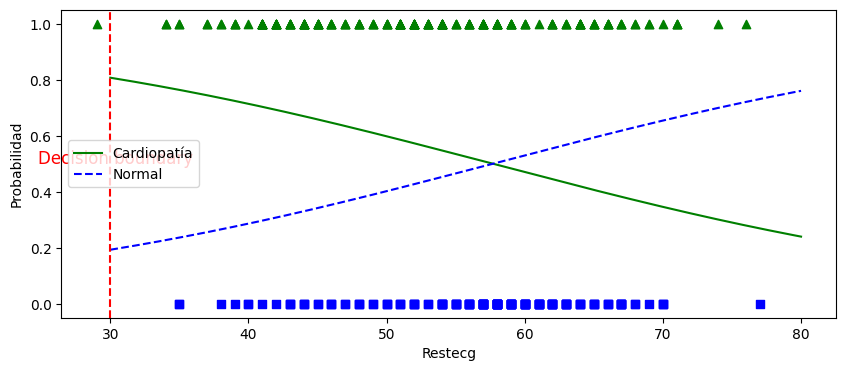

In [92]:
X = df['age']
Y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                        train_size   = 0.69,
                                        random_state = 1234
                                    )

log_reg = LogisticRegression()
log_reg.fit(X_train.array.reshape(-1,1), Y_train)

X_new = np.linspace(30, 80, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.grid()
plt.plot(X_new, y_proba[:, 1], "g-", label="Cardiopatía")
plt.plot(X_new, y_proba[:, 0], "b--", label="Normal")
plt.xlabel("Restecg")
plt.ylabel("Probabilidad")
plt.grid()
plt.legend(loc="center left")

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.axvline(x=decision_boundary, color='red', linestyle='--')
plt.text(decision_boundary+0.4, 0.5, "Decision boundary", fontsize=12, color="red", ha="center")

plt.scatter(X[Y==1],Y[Y==1], marker='^', c='g')
plt.scatter(X[Y==0],Y[Y==0], marker='s', c='b')

plt.show()

## Apartado c)

Entrenar de manera razonada un árbol de clasificación o decisión para decidir si un paciente tiene cardiopatía basándose 
en las variables más relevantes. Adjuntar los gráficos correspondientes con su interpretación. Comparar la matriz de confusión en TR con la matriz de confusión en TS.

Extraemos las variables más relevantes:

Procedemos a realizar el árbol de decisión:

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df[['restecg', 'age']], df['target'], test_size=0.31, random_state=123)

decision_tree = DecisionTreeClassifier(criterion='gini', random_state=123)
predictor = decision_tree.fit(X_train, y_train)
y_pred = predictor.predict(X_test)

In [66]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred,labels=['Normal','Cardiopatía']), display_labels=['Normal','Cardiopatía']).plot(cmap='Blues');

ValueError: At least one label specified must be in y_true

## Apartado d)

¿Se trata de un conjunto de datos desbalanceados respecto a la presencia o no de cardiopatía? Razonar si en este caso es 
preferible la regresión logística o el árbol de clasificación para decidir si un paciente tiene cardiopatía.

In [82]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Vemos que claramente no se trata de un conjunto de datos desbalanceados ya que los dos valores tienen cantidades muy parecidas.